In [ ]:
This is a real life problem but using dummy data from MS server SQL
I try to show how the process is most times with data science. Data isnt always given in an excell format but you have to 
go digging in SQL and tables you may not need to calculate for features you need but are not available
eg, using birthdays to calculate age, or date a customer first used a service to calculate Tenure

For this project, I try to briefly predict customer churn for a phantom company using MS adventure works data.
Enjoy!

In [172]:
import pyodbc # for commecting to sql
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from datetime import date
from matplotlib import dates as dates
import datetime as dt
import pyodbc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
import random


In [2]:
#Connecting yo SQL to get the relevant data
conn = pyodbc.connect('Driver={SQL Server};'
'Server=DESKTOP-MB976LQ;'
'Database=AdventureWorksDW2017;'
'Trusted_Connection=yes;')
sql_for_df = "select CustomerKey,BirthDate,DateFirstPurchase,MaritalStatus,Gender, YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned from dbo.DimCustomer"
dimCust = pd.read_sql(sql_for_df , conn)
conn.close()

In [3]:
#get data types
dimCust.dtypes

CustomerKey               int64
BirthDate                object
DateFirstPurchase        object
MaritalStatus            object
Gender                   object
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
EnglishEducation         object
EnglishOccupation        object
HouseOwnerFlag           object
NumberCarsOwned           int64
dtype: object

In [4]:
dimCust.head()

,CustomerKey,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned
0,11000,1971-10-06,2011-01-19,M,M,90000.0,2,0,Bachelors,Professional,1,0
1,11001,1976-05-10,2011-01-15,S,M,60000.0,3,3,Bachelors,Professional,0,1
2,11002,1971-02-09,2011-01-07,M,M,60000.0,3,3,Bachelors,Professional,1,1
3,11003,1973-08-14,2010-12-29,S,F,70000.0,0,0,Bachelors,Professional,0,1
4,11004,1979-08-05,2011-01-23,S,F,80000.0,5,5,Bachelors,Professional,1,4


In [5]:
dimCust.shape

(18484, 12)

In [6]:
#change birthday to date-time-format
dimCust['BirthDate'] = pd.to_datetime(dimCust['BirthDate'])
dimCust['DateFirstPurchase'] = pd.to_datetime(dimCust['DateFirstPurchase'])

In [7]:
#setting an end date for churn and age at the time of the data. this will be the end date of the data
#since its not a live data
endDate=dt.datetime(2014,1,20)

In [8]:
#add the end date to the table
dimCust["endDate"]=endDate

In [9]:
dimCust.head()

,CustomerKey,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,endDate
0,11000,1971-10-06,2011-01-19,M,M,90000.0,2,0,Bachelors,Professional,1,0,2014-01-20
1,11001,1976-05-10,2011-01-15,S,M,60000.0,3,3,Bachelors,Professional,0,1,2014-01-20
2,11002,1971-02-09,2011-01-07,M,M,60000.0,3,3,Bachelors,Professional,1,1,2014-01-20
3,11003,1973-08-14,2010-12-29,S,F,70000.0,0,0,Bachelors,Professional,0,1,2014-01-20
4,11004,1979-08-05,2011-01-23,S,F,80000.0,5,5,Bachelors,Professional,1,4,2014-01-20


In [10]:
dimCust.dtypes

CustomerKey                      int64
BirthDate               datetime64[ns]
DateFirstPurchase       datetime64[ns]
MaritalStatus                   object
Gender                          object
YearlyIncome                   float64
TotalChildren                    int64
NumberChildrenAtHome             int64
EnglishEducation                object
EnglishOccupation               object
HouseOwnerFlag                  object
NumberCarsOwned                  int64
endDate                 datetime64[ns]
dtype: object

In [11]:
#add age column and change to datetime format
dimCust["Age"]=dimCust["endDate"]-dimCust["BirthDate"]
dimCust['Age']=dimCust['Age']/np.timedelta64(1,'Y')

In [12]:
dimCust.head()

,CustomerKey,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,endDate,Age
0,11000,1971-10-06,2011-01-19,M,M,90000.0,2,0,Bachelors,Professional,1,0,2014-01-20,42.292450
1,11001,1976-05-10,2011-01-15,S,M,60000.0,3,3,Bachelors,Professional,0,1,2014-01-20,37.698242
2,11002,1971-02-09,2011-01-07,M,M,60000.0,3,3,Bachelors,Professional,1,1,2014-01-20,42.946809
3,11003,1973-08-14,2010-12-29,S,F,70000.0,0,0,Bachelors,Professional,0,1,2014-01-20,40.436149
4,11004,1979-08-05,2011-01-23,S,F,80000.0,5,5,Bachelors,Professional,1,4,2014-01-20,34.462035


In [13]:
dimCust.dtypes

CustomerKey                      int64
BirthDate               datetime64[ns]
DateFirstPurchase       datetime64[ns]
MaritalStatus                   object
Gender                          object
YearlyIncome                   float64
TotalChildren                    int64
NumberChildrenAtHome             int64
EnglishEducation                object
EnglishOccupation               object
HouseOwnerFlag                  object
NumberCarsOwned                  int64
endDate                 datetime64[ns]
Age                            float64
dtype: object

In [14]:
dimCust.shape

(18484, 14)

In [15]:
#getting more features form sql
conn = pyodbc.connect('Driver={SQL Server};'
'Server=DESKTOP-MB976LQ;'
'Database=AdventureWorksDW2017;'
'Trusted_Connection=yes;')
sql_for_df = "select CustomerKey,SalesOrderNumber,SalesAmount,ProductStandardCost,OrderQuantity, SalesAmount-ProductStandardCost as Profit, OrderDate from dbo.FactInternetSales"
sale = pd.read_sql(sql_for_df , conn)
conn.close()

In [16]:
sale.head()

,CustomerKey,SalesOrderNumber,SalesAmount,ProductStandardCost,OrderQuantity,Profit,OrderDate
0,21768,SO43697,3578.2700,2171.2942,1,1406.9758,2010-12-29
1,28389,SO43698,3399.9900,1912.1544,1,1487.8356,2010-12-29
2,25863,SO43699,3399.9900,1912.1544,1,1487.8356,2010-12-29
3,14501,SO43700,699.0982,413.1463,1,285.9519,2010-12-29
4,11003,SO43701,3399.9900,1912.1544,1,1487.8356,2010-12-29


In [17]:
sale.shape

(60398, 7)

In [18]:
sale.dtypes

CustomerKey                     int64
SalesOrderNumber               object
SalesAmount                   float64
ProductStandardCost           float64
OrderQuantity                   int64
Profit                        float64
OrderDate              datetime64[ns]
dtype: object

In [19]:
saleDf=sale.copy()

In [20]:
#get the minimum and maximum transaction date
agg= ["max", "min"] 
dateTable=saleDf.groupby("CustomerKey").agg({"OrderDate" 
                                       :agg}).reset_index()

In [21]:
dateTable.head()

CustomerKey  OrderDate           
                     max        min
0       11000 2013-05-03 2011-01-19
1       11001 2013-12-10 2011-01-15
2       11002 2013-02-23 2011-01-07
3       11003 2013-05-10 2010-12-29
4       11004 2013-05-01 2011-01-23

In [22]:
dateTable.shape

(18484, 3)

In [23]:
#drop customer key
dtt=dateTable.drop("CustomerKey", axis = 1)
dtt.columns=["_".join(dtt) for dtt in dtt.columns.ravel()]
dtt.head()

C:\Users\anuma\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-23-79c7d109ba18>:3: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



,OrderDate_max,OrderDate_min
0,2013-05-03,2011-01-19
1,2013-12-10,2011-01-15
2,2013-02-23,2011-01-07
3,2013-05-10,2010-12-29
4,2013-05-01,2011-01-23


In [24]:
#add customer key back

dtt.insert(0, "CustomerKey", dateTable["CustomerKey"])
dtt.head()

,CustomerKey,OrderDate_max,OrderDate_min
0,11000,2013-05-03,2011-01-19
1,11001,2013-12-10,2011-01-15
2,11002,2013-02-23,2011-01-07
3,11003,2013-05-10,2010-12-29
4,11004,2013-05-01,2011-01-23


In [25]:
#group and aggrigate the coulums
agg= ["max", "min","sum"] 
vv=saleDf.groupby("CustomerKey").agg({"SalesAmount":agg, "ProductStandardCost":
                                             agg,"OrderQuantity":agg,"Profit":agg}).reset_index()

In [26]:
vv.head()

CustomerKey SalesAmount                 ProductStandardCost           \
                      max    min      sum                 max      min   
0       11000     3399.99   4.99  8248.99           1912.1544   1.8663   
1       11001     3374.99   4.99  6383.88           1898.0944   1.8663   
2       11002     3399.99  34.99  8114.04           1912.1544  13.0863   
3       11003     3399.99   2.29  8139.29           1912.1544   0.8565   
4       11004     3399.99  21.98  8196.01           1912.1544   8.2205   

             OrderQuantity             Profit                      
         sum           max min sum        max      min        sum  
0  4735.2995             1   1   8  1487.8356   3.1237  3513.6905  
1  3587.9961             1   1  11  1476.8956   2.0677  2795.8839  
2  4659.1599             1   1   4  1487.8356  21.9037  3454.8801  
3  4672.1636             1   1   9  1487.8356   1.4335  3467.1264  
4  4694.1049             1   1   6  1487.8356  13.7595  3501.9051

In [27]:
#drop customer key and merge the table
qq=vv.drop("CustomerKey", axis = 1)
qq.columns=["_".join(qq) for qq in qq.columns.ravel()]
qq.head()


C:\Users\anuma\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-27-1e0d3dd40c5d>:3: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



,SalesAmount_max,SalesAmount_min,SalesAmount_sum,ProductStandardCost_max,ProductStandardCost_min,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,Profit_max,Profit_min,Profit_sum
0,3399.99,4.99,8248.99,1912.1544,1.8663,4735.2995,1,1,8,1487.8356,3.1237,3513.6905
1,3374.99,4.99,6383.88,1898.0944,1.8663,3587.9961,1,1,11,1476.8956,2.0677,2795.8839
2,3399.99,34.99,8114.04,1912.1544,13.0863,4659.1599,1,1,4,1487.8356,21.9037,3454.8801
3,3399.99,2.29,8139.29,1912.1544,0.8565,4672.1636,1,1,9,1487.8356,1.4335,3467.1264
4,3399.99,21.98,8196.01,1912.1544,8.2205,4694.1049,1,1,6,1487.8356,13.7595,3501.9051


In [28]:
#add customer key back
qq.insert(0, "CustomerKey", vv["CustomerKey"])
qq.head()

,CustomerKey,SalesAmount_max,SalesAmount_min,SalesAmount_sum,ProductStandardCost_max,ProductStandardCost_min,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,Profit_max,Profit_min,Profit_sum
0,11000,3399.99,4.99,8248.99,1912.1544,1.8663,4735.2995,1,1,8,1487.8356,3.1237,3513.6905
1,11001,3374.99,4.99,6383.88,1898.0944,1.8663,3587.9961,1,1,11,1476.8956,2.0677,2795.8839
2,11002,3399.99,34.99,8114.04,1912.1544,13.0863,4659.1599,1,1,4,1487.8356,21.9037,3454.8801
3,11003,3399.99,2.29,8139.29,1912.1544,0.8565,4672.1636,1,1,9,1487.8356,1.4335,3467.1264
4,11004,3399.99,21.98,8196.01,1912.1544,8.2205,4694.1049,1,1,6,1487.8356,13.7595,3501.9051


In [29]:
qq.shape

(18484, 13)

In [30]:
data=qq.merge(vv, on=["CustomerKey"])

C:\Users\anuma\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning:

merging between different levels can give an unintended result (1 levels on the left,2 on the right)

C:\Users\anuma\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [31]:
data.head()

,CustomerKey,SalesAmount_max,SalesAmount_min,SalesAmount_sum,ProductStandardCost_max,ProductStandardCost_min,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,...,"(SalesAmount, sum)","(ProductStandardCost, max)","(ProductStandardCost, min)","(ProductStandardCost, sum)","(OrderQuantity, max)","(OrderQuantity, min)","(OrderQuantity, sum)","(Profit, max)","(Profit, min)","(Profit, sum)"
0,11000,3399.99,4.99,8248.99,1912.1544,1.8663,4735.2995,1,1,8,...,8248.99,1912.1544,1.8663,4735.2995,1,1,8,1487.8356,3.1237,3513.6905
1,11001,3374.99,4.99,6383.88,1898.0944,1.8663,3587.9961,1,1,11,...,6383.88,1898.0944,1.8663,3587.9961,1,1,11,1476.8956,2.0677,2795.8839
2,11002,3399.99,34.99,8114.04,1912.1544,13.0863,4659.1599,1,1,4,...,8114.04,1912.1544,13.0863,4659.1599,1,1,4,1487.8356,21.9037,3454.8801
3,11003,3399.99,2.29,8139.29,1912.1544,0.8565,4672.1636,1,1,9,...,8139.29,1912.1544,0.8565,4672.1636,1,1,9,1487.8356,1.4335,3467.1264
4,11004,3399.99,21.98,8196.01,1912.1544,8.2205,4694.1049,1,1,6,...,8196.01,1912.1544,8.2205,4694.1049,1,1,6,1487.8356,13.7595,3501.9051


In [32]:
# merge qq with dimcust
data=dtt.merge(dimCust, on=["CustomerKey"])

In [33]:
data.head()

,CustomerKey,OrderDate_max,OrderDate_min,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,endDate,Age
0,11000,2013-05-03,2011-01-19,1971-10-06,2011-01-19,M,M,90000.0,2,0,Bachelors,Professional,1,0,2014-01-20,42.292450
1,11001,2013-12-10,2011-01-15,1976-05-10,2011-01-15,S,M,60000.0,3,3,Bachelors,Professional,0,1,2014-01-20,37.698242
2,11002,2013-02-23,2011-01-07,1971-02-09,2011-01-07,M,M,60000.0,3,3,Bachelors,Professional,1,1,2014-01-20,42.946809
3,11003,2013-05-10,2010-12-29,1973-08-14,2010-12-29,S,F,70000.0,0,0,Bachelors,Professional,0,1,2014-01-20,40.436149
4,11004,2013-05-01,2011-01-23,1979-08-05,2011-01-23,S,F,80000.0,5,5,Bachelors,Professional,1,4,2014-01-20,34.462035


In [34]:
data.shape

(18484, 16)

In [35]:
#add df to the data
df=data.merge(qq, on=["CustomerKey"])

In [36]:
df.head()

,CustomerKey,OrderDate_max,OrderDate_min,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,SalesAmount_sum,ProductStandardCost_max,ProductStandardCost_min,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,Profit_max,Profit_min,Profit_sum
0,11000,2013-05-03,2011-01-19,1971-10-06,2011-01-19,M,M,90000.0,2,0,...,8248.99,1912.1544,1.8663,4735.2995,1,1,8,1487.8356,3.1237,3513.6905
1,11001,2013-12-10,2011-01-15,1976-05-10,2011-01-15,S,M,60000.0,3,3,...,6383.88,1898.0944,1.8663,3587.9961,1,1,11,1476.8956,2.0677,2795.8839
2,11002,2013-02-23,2011-01-07,1971-02-09,2011-01-07,M,M,60000.0,3,3,...,8114.04,1912.1544,13.0863,4659.1599,1,1,4,1487.8356,21.9037,3454.8801
3,11003,2013-05-10,2010-12-29,1973-08-14,2010-12-29,S,F,70000.0,0,0,...,8139.29,1912.1544,0.8565,4672.1636,1,1,9,1487.8356,1.4335,3467.1264
4,11004,2013-05-01,2011-01-23,1979-08-05,2011-01-23,S,F,80000.0,5,5,...,8196.01,1912.1544,8.2205,4694.1049,1,1,6,1487.8356,13.7595,3501.9051


In [37]:
df.columns

Index(['CustomerKey', 'OrderDate_max', 'OrderDate_min', 'BirthDate',
       'DateFirstPurchase', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'endDate',
       'Age', 'SalesAmount_max', 'SalesAmount_min', 'SalesAmount_sum',
       'ProductStandardCost_max', 'ProductStandardCost_min',
       'ProductStandardCost_sum', 'OrderQuantity_max', 'OrderQuantity_min',
       'OrderQuantity_sum', 'Profit_max', 'Profit_min', 'Profit_sum'],
      dtype='object')

In [38]:
#calculate tenure, convert to datetime
df["Ternure"]=df['OrderDate_max']-df['DateFirstPurchase']
df['Ternure']=df['Ternure']/np.timedelta64(1,'D')

In [39]:
df.head()

,CustomerKey,OrderDate_max,OrderDate_min,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,ProductStandardCost_max,ProductStandardCost_min,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,Profit_max,Profit_min,Profit_sum,Ternure
0,11000,2013-05-03,2011-01-19,1971-10-06,2011-01-19,M,M,90000.0,2,0,...,1912.1544,1.8663,4735.2995,1,1,8,1487.8356,3.1237,3513.6905,835.0
1,11001,2013-12-10,2011-01-15,1976-05-10,2011-01-15,S,M,60000.0,3,3,...,1898.0944,1.8663,3587.9961,1,1,11,1476.8956,2.0677,2795.8839,1060.0
2,11002,2013-02-23,2011-01-07,1971-02-09,2011-01-07,M,M,60000.0,3,3,...,1912.1544,13.0863,4659.1599,1,1,4,1487.8356,21.9037,3454.8801,778.0
3,11003,2013-05-10,2010-12-29,1973-08-14,2010-12-29,S,F,70000.0,0,0,...,1912.1544,0.8565,4672.1636,1,1,9,1487.8356,1.4335,3467.1264,863.0
4,11004,2013-05-01,2011-01-23,1979-08-05,2011-01-23,S,F,80000.0,5,5,...,1912.1544,8.2205,4694.1049,1,1,6,1487.8356,13.7595,3501.9051,829.0


In [40]:
df.columns

Index(['CustomerKey', 'OrderDate_max', 'OrderDate_min', 'BirthDate',
       'DateFirstPurchase', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'endDate',
       'Age', 'SalesAmount_max', 'SalesAmount_min', 'SalesAmount_sum',
       'ProductStandardCost_max', 'ProductStandardCost_min',
       'ProductStandardCost_sum', 'OrderQuantity_max', 'OrderQuantity_min',
       'OrderQuantity_sum', 'Profit_max', 'Profit_min', 'Profit_sum',
       'Ternure'],
      dtype='object')

In [41]:
#calculate last time they used AHG
df["SincelastUsed"]=df['endDate']-data['OrderDate_max']
df['SincelastUsed']=df['SincelastUsed']/np.timedelta64(1,'D')

In [42]:
df.head()

,CustomerKey,OrderDate_max,OrderDate_min,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,ProductStandardCost_min,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,Profit_max,Profit_min,Profit_sum,Ternure,SincelastUsed
0,11000,2013-05-03,2011-01-19,1971-10-06,2011-01-19,M,M,90000.0,2,0,...,1.8663,4735.2995,1,1,8,1487.8356,3.1237,3513.6905,835.0,262.0
1,11001,2013-12-10,2011-01-15,1976-05-10,2011-01-15,S,M,60000.0,3,3,...,1.8663,3587.9961,1,1,11,1476.8956,2.0677,2795.8839,1060.0,41.0
2,11002,2013-02-23,2011-01-07,1971-02-09,2011-01-07,M,M,60000.0,3,3,...,13.0863,4659.1599,1,1,4,1487.8356,21.9037,3454.8801,778.0,331.0
3,11003,2013-05-10,2010-12-29,1973-08-14,2010-12-29,S,F,70000.0,0,0,...,0.8565,4672.1636,1,1,9,1487.8356,1.4335,3467.1264,863.0,255.0
4,11004,2013-05-01,2011-01-23,1979-08-05,2011-01-23,S,F,80000.0,5,5,...,8.2205,4694.1049,1,1,6,1487.8356,13.7595,3501.9051,829.0,264.0


In [43]:
#calculate churn, if more than 8months, 1, else 0
df["Churn"]=np.where(df['SincelastUsed']>=240, 1, 0)

In [44]:
df.head()

,CustomerKey,OrderDate_max,OrderDate_min,BirthDate,DateFirstPurchase,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,ProductStandardCost_sum,OrderQuantity_max,OrderQuantity_min,OrderQuantity_sum,Profit_max,Profit_min,Profit_sum,Ternure,SincelastUsed,Churn
0,11000,2013-05-03,2011-01-19,1971-10-06,2011-01-19,M,M,90000.0,2,0,...,4735.2995,1,1,8,1487.8356,3.1237,3513.6905,835.0,262.0,1
1,11001,2013-12-10,2011-01-15,1976-05-10,2011-01-15,S,M,60000.0,3,3,...,3587.9961,1,1,11,1476.8956,2.0677,2795.8839,1060.0,41.0,0
2,11002,2013-02-23,2011-01-07,1971-02-09,2011-01-07,M,M,60000.0,3,3,...,4659.1599,1,1,4,1487.8356,21.9037,3454.8801,778.0,331.0,1
3,11003,2013-05-10,2010-12-29,1973-08-14,2010-12-29,S,F,70000.0,0,0,...,4672.1636,1,1,9,1487.8356,1.4335,3467.1264,863.0,255.0,1
4,11004,2013-05-01,2011-01-23,1979-08-05,2011-01-23,S,F,80000.0,5,5,...,4694.1049,1,1,6,1487.8356,13.7595,3501.9051,829.0,264.0,1


In [45]:
df.shape

(18484, 31)

In [46]:
df.dtypes

CustomerKey                         int64
OrderDate_max              datetime64[ns]
OrderDate_min              datetime64[ns]
BirthDate                  datetime64[ns]
DateFirstPurchase          datetime64[ns]
MaritalStatus                      object
Gender                             object
YearlyIncome                      float64
TotalChildren                       int64
NumberChildrenAtHome                int64
EnglishEducation                   object
EnglishOccupation                  object
HouseOwnerFlag                     object
NumberCarsOwned                     int64
endDate                    datetime64[ns]
Age                               float64
SalesAmount_max                   float64
SalesAmount_min                   float64
SalesAmount_sum                   float64
ProductStandardCost_max           float64
ProductStandardCost_min           float64
ProductStandardCost_sum           float64
OrderQuantity_max                   int64
OrderQuantity_min                 

In [47]:
df.isna().sum()

CustomerKey                0
OrderDate_max              0
OrderDate_min              0
BirthDate                  0
DateFirstPurchase          0
MaritalStatus              0
Gender                     0
YearlyIncome               0
TotalChildren              0
NumberChildrenAtHome       0
EnglishEducation           0
EnglishOccupation          0
HouseOwnerFlag             0
NumberCarsOwned            0
endDate                    0
Age                        0
SalesAmount_max            0
SalesAmount_min            0
SalesAmount_sum            0
ProductStandardCost_max    0
ProductStandardCost_min    0
ProductStandardCost_sum    0
OrderQuantity_max          0
OrderQuantity_min          0
OrderQuantity_sum          0
Profit_max                 0
Profit_min                 0
Profit_sum                 0
Ternure                    0
SincelastUsed              0
Churn                      0
dtype: int64

# EDA

In [48]:
df['Churn'].value_counts() #only 5252 customers have churned

0    13232
1     5252
Name: Churn, dtype: int64

In [49]:
columns=df.columns
binary_cols=[]

for cols in columns:
    if df[cols].value_counts().shape[0]==2:
        binary_cols.append(cols)

In [50]:
binary_cols

['MaritalStatus', 'Gender', 'HouseOwnerFlag', 'Churn']

C:\Users\anuma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\anuma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\anuma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\anuma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

<AxesSubplot:xlabel='Churn', ylabel='count'>

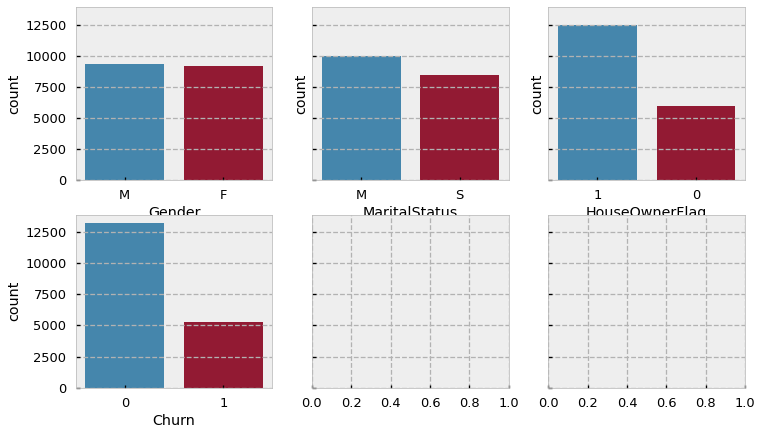

In [51]:
#lets look at the class distribution of the binaty columms in the data
plt.style.use(['bmh','seaborn-talk'])
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0,0])
sns.countplot("MaritalStatus", data=df, ax=axes[0,1])
sns.countplot("HouseOwnerFlag", data=df, ax=axes[0,2])
sns.countplot("Churn", data=df, ax=axes[1,0])


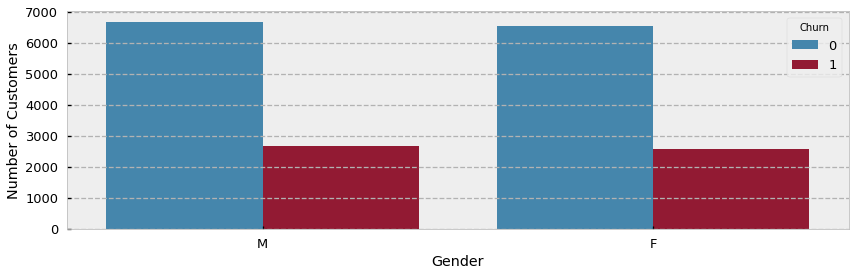

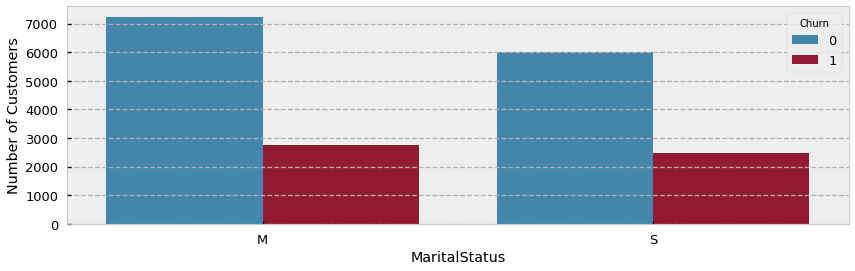

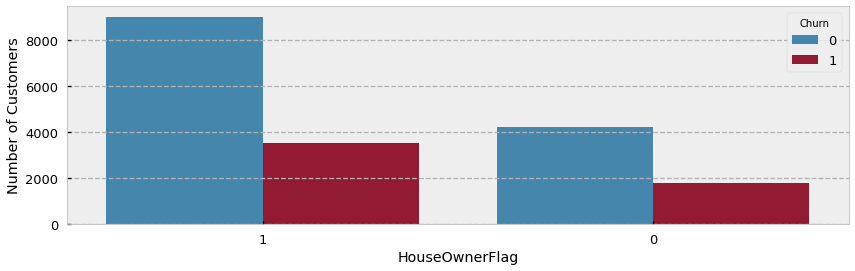

In [52]:
plt.style.use(['bmh','seaborn-talk'])

cols = ['Gender', 'MaritalStatus', 'HouseOwnerFlag']

for i in cols:
    plt.figure(figsize=(14,4))
    sns.countplot(x=i, hue='Churn', data=df)
    plt.ylabel('Number of Customers')
    plt.show()

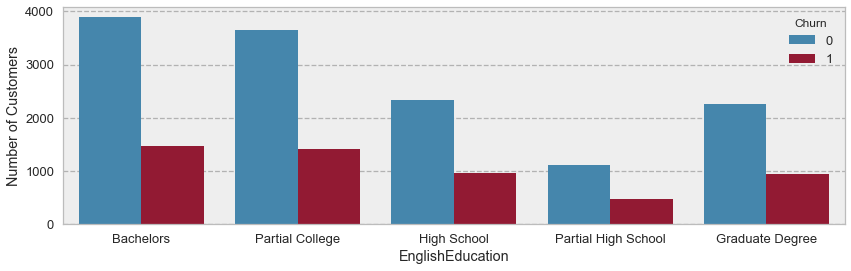

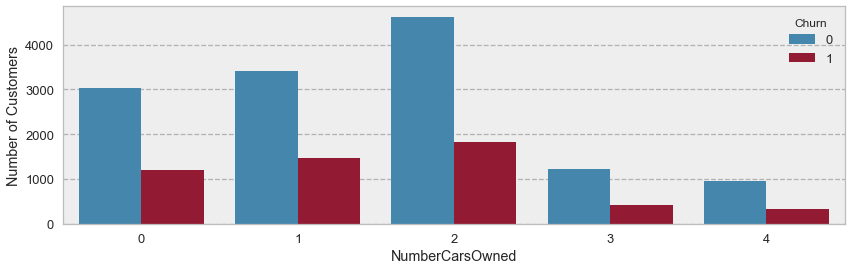

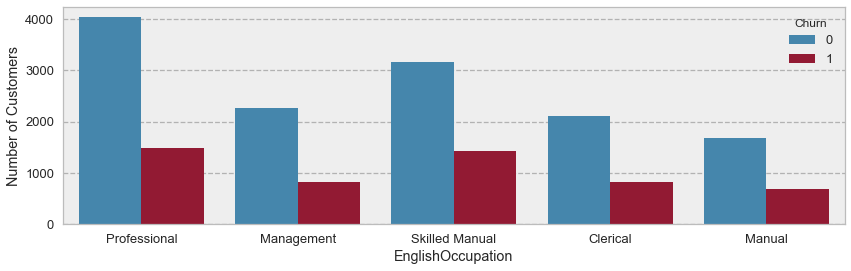

In [160]:
plt.style.use(['bmh','seaborn-talk'])

cols = ['EnglishEducation', 'NumberCarsOwned',
       'EnglishOccupation']

for i in cols:
    plt.figure(figsize=(14,4))
    sns.countplot(x=i, hue='Churn', data=df)
    plt.ylabel('Number of Customers')
    plt.show()
    

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (18484).

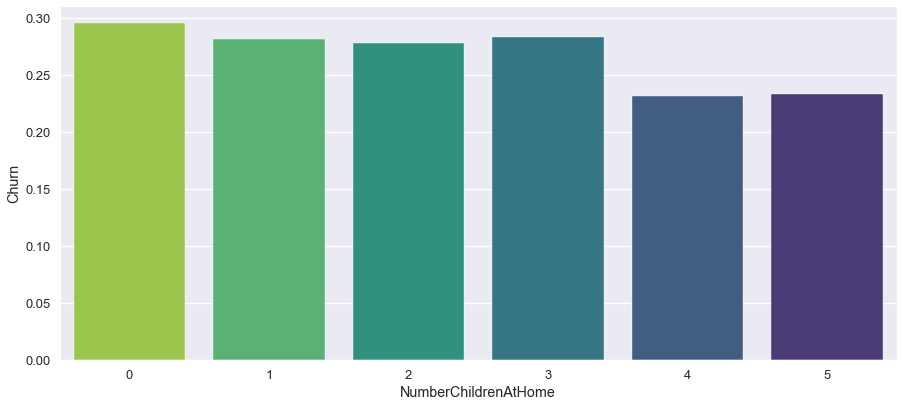

In [170]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=df, x='NumberChildrenAtHome', y='Churn',
                ci=False, palette='viridis_r')
g.set_xticklabels(df['NumberChildrenAtHome'], rotation=55, fontdict={'fontsize':10})
plt.show()

In [53]:
#Lets dee of the churn rate for male and females are thesame
#in other words, lets see if gender afects churn

df[['Gender','Churn']].groupby(['Gender']).mean()

,Churn
Gender,
F,0.283368
M,0.284889


In [54]:
# similarly, lets look at the churn rate in marital status and house owner flag

df[['MaritalStatus','Churn']].groupby(['MaritalStatus']).mean(),df[['HouseOwnerFlag','Churn']].groupby(['HouseOwnerFlag']).mean()

(                  Churn
 MaritalStatus          
 M              0.276596
 S              0.293049,
                    Churn
 HouseOwnerFlag          
 0               0.293547
 1               0.279635)

In [55]:
table = pd.pivot_table(df, values='Churn', index=['Gender'],
                    columns=['HouseOwnerFlag'], aggfunc=np.mean)
table

HouseOwnerFlag,0,1
Gender,,
F,0.292234,0.279167
M,0.294813,0.280095


In [ ]:
plt.style.use(['bmh','seaborn-talk'])

cols = ['Gender', 'MaritalStatus', 'HouseOwnerFlag']

for i in cols:
    plt.figure(figsize=(14,4))
    sns.countplot(x=i, hue='Churn', data=df)
    plt.ylabel('Number of Customers')
    plt.show()

In [99]:
dFrm=df.copy() #good practice to save copies of your work so you can always return to a point and make adjustments if needed

C:\Users\anuma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



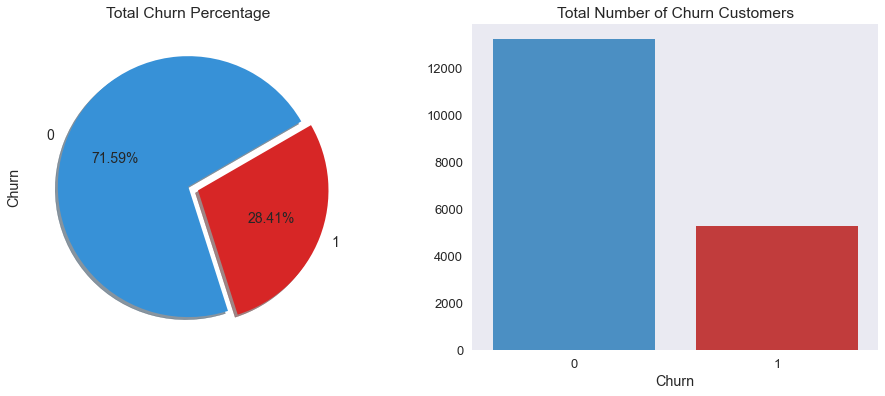

In [100]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

dFrm['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#3791D7", "#D72626"])
ax[0].set_title('Total Churn Percentage')

sns.countplot('Churn', data=dFrm, ax=ax[1], palette=["#3791D7", "#D72626"])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

In [101]:
dFrm.shape

(18484, 31)

In [102]:
#I will drop cols that have no use in the models. these will only add noise and unwanted data in the model

dFrm.drop(['OrderDate_max','OrderDate_min','BirthDate','DateFirstPurchase','endDate',
         'SalesAmount_max', 'SalesAmount_min',
       'ProductStandardCost_max', 'ProductStandardCost_min','ProductStandardCost_sum',
         'OrderQuantity_max', 'OrderQuantity_min','Profit_max', 'Profit_min', 'Profit_sum',
         'SincelastUsed'], axis=1, inplace=True)

In [103]:
dFrm.shape

(18484, 15)

In [104]:
dFrm.columns

Index(['CustomerKey', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'Age',
       'SalesAmount_sum', 'OrderQuantity_sum', 'Ternure', 'Churn'],
      dtype='object')

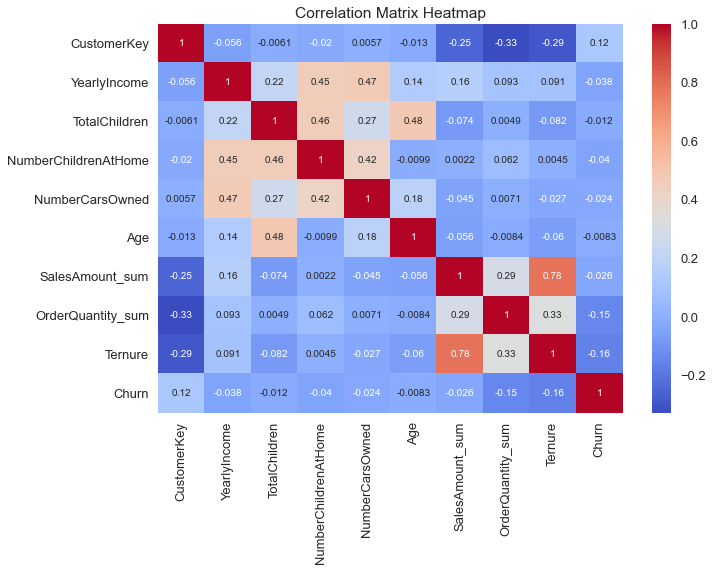

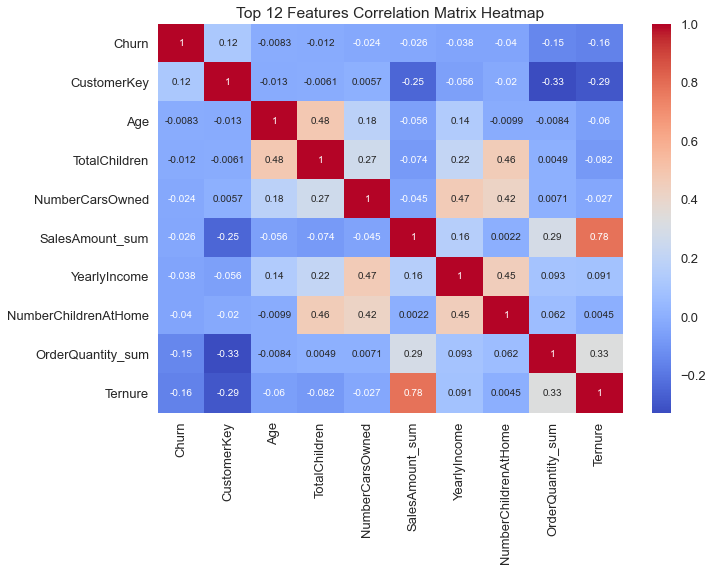

In [105]:
# Calculate the correlation matrix
corr_matrix = dFrm.corr()

# Plot the correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Get the top n features with highest correlation
n = 12
top_n_features = corr_matrix.nlargest(n, 'Churn')['Churn'].index
top_n_correlations = dFrm[top_n_features].corr()

# Plot the top n features correlation matrix using heatmap
sns.heatmap(top_n_correlations, annot=True, cmap='coolwarm')
plt.title(f'Top {n} Features Correlation Matrix Heatmap')
plt.show()

# Select the top n features
selected_features = list(top_n_features)

In [106]:
selected_features 
#interesting how marital status and gender is not amonge the top relivant features and these 
#are features i would naturally want to include in a ML process

['Churn',
 'CustomerKey',
 'Age',
 'TotalChildren',
 'NumberCarsOwned',
 'SalesAmount_sum',
 'YearlyIncome',
 'NumberChildrenAtHome',
 'OrderQuantity_sum',
 'Ternure']

In [107]:
dFrm.columns

Index(['CustomerKey', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'Age',
       'SalesAmount_sum', 'OrderQuantity_sum', 'Ternure', 'Churn'],
      dtype='object')

In [108]:
colu=['MaritalStatus', 'Gender','NumberChildrenAtHome','OrderQuantity_sum','EnglishEducation',
       'EnglishOccupation']
dFrm.drop(colu, axis =1, inplace=True)

#I chose to leave Education and occupation in the data and as suspected, Gender and Marital status  did not play a part in churn

In [109]:
dFrm.columns

Index(['CustomerKey', 'YearlyIncome', 'TotalChildren', 'HouseOwnerFlag',
       'NumberCarsOwned', 'Age', 'SalesAmount_sum', 'Ternure', 'Churn'],
      dtype='object')

In [110]:
dFrm.head()

,CustomerKey,YearlyIncome,TotalChildren,HouseOwnerFlag,NumberCarsOwned,Age,SalesAmount_sum,Ternure,Churn
0,11000,90000.0,2,1,0,42.292450,8248.99,835.0,1
1,11001,60000.0,3,0,1,37.698242,6383.88,1060.0,0
2,11002,60000.0,3,1,1,42.946809,8114.04,778.0,1
3,11003,70000.0,0,0,1,40.436149,8139.29,863.0,1
4,11004,80000.0,5,1,4,34.462035,8196.01,829.0,1


### Scaling the daya

In [111]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [116]:
#cat_features = ['EnglishEducation', 'EnglishOccupation']
#X = pd.get_dummies(dFrm, columns=cat_features, drop_first=True)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dFrm)

# Resampling

In [120]:
from sklearn.utils import resample

dFrm_majority = dFrm[dFrm.Churn==0]
dFrm_minority = dFrm[dFrm.Churn==1]

dFrm_minority_upsampled = resample(dFrm_minority,
                                replace=True,
                                n_samples=13200,
                                random_state=123)

dFrm_upsampled = pd.concat([dFrm_majority, dFrm_minority_upsampled])

print('Churn Count in Original Data: \n', dFrm.Churn.value_counts(), '\n')
print('New Churn Count: \n', dFrm_upsampled.Churn.value_counts())

Churn Count in Original Data: 
 0    13232
1     5252
Name: Churn, dtype: int64 

New Churn Count: 
 0    13232
1    13200
Name: Churn, dtype: int64


In [121]:
 dFrm_upsampled.Churn.value_counts()

0    13232
1    13200
Name: Churn, dtype: int64

C:\Users\anuma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



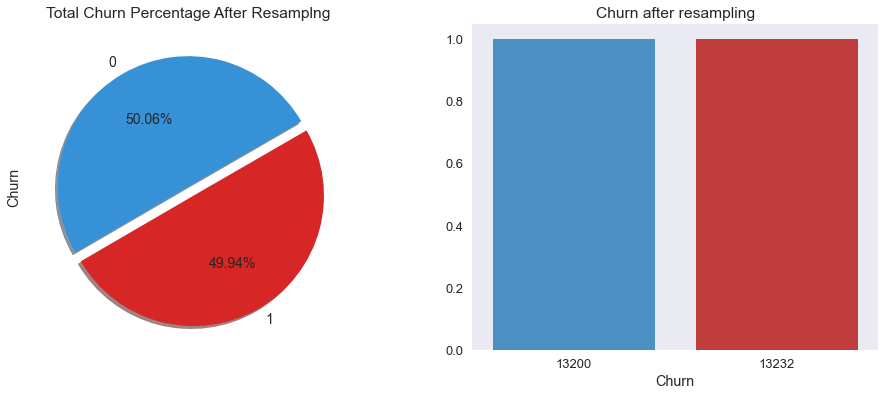

In [122]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

dFrm_upsampled.Churn.value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#3791D7", "#D72626"])
ax[0].set_title('Total Churn Percentage After Resamplng')

sns.countplot(dFrm_upsampled.Churn.value_counts(), ax=ax[1], palette=["#3791D7", "#D72626"])
ax[1].set_title('Churn after resampling')
ax[1].set_ylabel(' ')

plt.show()

# ML Model

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = dFrm_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = dFrm_upsampled['Churn'] #target (dependent variable)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=200)

In [126]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [127]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [128]:
pred = clf_ridge.predict(X_train)  #make predictions on training set

In [129]:
accuracy_score(y_train, pred) #accuracy on training set

0.5729013951288721

In [130]:
confusion_matrix(y_train, pred)

array([[5505, 5047],
       [3984, 6609]], dtype=int64)

In [131]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.575373557783242

#Multiple models

In [155]:
from sklearn.model_selection import train_test_split

# Separate input features (X) and target variable (y)
y = dFrm_upsampled.Churn
X = dFrm_upsampled.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.30)

In [181]:
from sklearn.metrics import classification_report, precision_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [183]:
classifier_list = [ LogisticRegression(),
                    KNeighborsClassifier(),
                    #GaussianNB(priors=None),
                    RandomForestClassifier(),
                     DecisionTreeClassifier() ]

for clf in classifier_list:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    precision = precision_score(y_test, predictions) 
    accuracy = accuracy_score(y_test, predictions)
    
    
# Precision_score = tp / (tp + fp)
# Accuracy_score = (# of correctly assigned rows) / (All rows)

    print(clf, '\n \n',classification_report(y_test, predictions), 
          '\n \nPrecision Score: ' , precision,
          '\nAccuracy Score: ', accuracy,
          '\n\n----------------------------------------------------------------\n\n')

LogisticRegression() 
 
               precision    recall  f1-score   support

           0       0.59      0.51      0.54      3992
           1       0.56      0.64      0.60      3938

    accuracy                           0.57      7930
   macro avg       0.57      0.57      0.57      7930
weighted avg       0.58      0.57      0.57      7930
 
 
Precision Score:  0.561540173603383 
Accuracy Score:  0.573139974779319 

----------------------------------------------------------------


KNeighborsClassifier() 
 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      3992
           1       0.75      0.84      0.79      3938

    accuracy                           0.78      7930
   macro avg       0.79      0.78      0.78      7930
weighted avg       0.79      0.78      0.78      7930
 
 
Precision Score:  0.7517068730086481 
Accuracy Score:  0.7823455233291299 

----------------------------------------------------------------


Rand